# Activity: Explore sampling

## Introduction
In this activity, you will engage in effective sampling of a dataset in order to make it easier to analyze. As a data professional you will often work with extremely large datasets, and utilizing proper sampling techniques helps you improve your efficiency in this work. 

For this activity, you are a member of an analytics team for the Environmental Protection Agency. You are assigned to analyze data on air quality with respect to carbon monoxide—a major air pollutant—and report your findings. The data utilized in this activity includes information from over 200 sites, identified by their state name, county name, city name, and local site name. You will use effective sampling within this dataset. 

## Step 1: Imports

### Import packages

Import `pandas`,  `numpy`, `matplotlib`, `statsmodels`, and `scipy`. 

In [1]:
# Import libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

### Load the dataset

As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ###
epa_data = pd.read_csv("c4_epa_air_quality.csv", index_col = 0)

<details>
  <summary><h4>Hint 1</h4></summary>

Use the function in the `pandas` library that allows you to read in data from a csv file and load it into a DataFrame. 

</details>

<details>
  <summary><h4>Hint 2</h4></summary>

Use the `read_csv` function from the pandas `library`. Set the `index_col` parameter to `0` to read in the first column as an index (and to avoid `"Unnamed: 0"` appearing as a column in the resulting Dataframe).

</details>

## Step 2: Data exploration

### Examine the data

To understand how the dataset is structured, examine the first 10 rows of the data.

In [3]:
# First 10 rows of the data
epa_data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.994737,14
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.200000,2
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,0.200000,2
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,0.400000,5
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,0.300000,6


<details>
  <summary><h4><strong> Hint 1 </STRONG></h4></summary>

Use the function in the `pandas` library that allows you to get a specific number of rows from the top of a DataFrame. 

</details>

<details>
  <summary><h4><strong> Hint 2 </STRONG></h4></summary>

Use the `head` function from the `pandas` library. Set the `n` parameter to `10` to print out the first 10 rows.

</details>

**Question:** What does the `aqi` column represent?

The aqi column represents the Air Quality Index, a numerical value that indicates how clean or polluted the air is. Higher values typically reflect worse air quality and greater potential health risks.

### Generate a table of descriptive statistics

Generate a table of some descriptive statistics about the data. Specify that all columns of the input be included in the output.

In [4]:
# Descriptive statistics for all columns
epa_data.describe(include='all')

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
count,260,260,260,260,257,260,260,260.000000,260.000000
unique,1,52,149,190,253,1,1,NaN,NaN
top,2018-01-01,California,Los Angeles,Not in a city,Kapolei,Carbon monoxide,Parts per million,NaN,NaN
freq,260,66,14,21,2,260,260,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.403169,6.757692
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.317902,7.061707
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276315,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.516009,9.000000


<details>
  <summary><h4>Hint 1</h4></summary>

Use function in the `pandas` library that allows you to generate a table of basic descriptive statistics in a DataFrame.

</details>

<details>
  <summary><h4>Hint 2</h4></summary>

Use the `describe` function from the `pandas` library. Set the `include` parameter passed in to this function to 'all' to specify that all columns of the input be included in the output.

</details>

**Question:** Based on the preceding table of descriptive statistics, what is the mean value of the `aqi` column? 

The mean value of the aqi column is 6.757692.

**Question:** Based on the preceding table of descriptive statistics, what do you notice about the count value for the `aqi` column?

The count value for the aqi column is 260, which matches the total number of rows in the dataset. This means there are no missing values in the aqi column.

### Use the `mean()` function on the `aqi`  column

Now, use the `mean()` function on the `aqi`  column and assign the value to a variable `population_mean`. The value should be the same as the one generated by the `describe()` method in the above table. 

In [5]:
# Calculate the mean of the aqi column
population_mean = epa_data['aqi'].mean()

# Display the result
print(population_mean)

6.757692307692308


<details>
  <summary><h4><strong> Hint 1 </STRONG></h4></summary>

Use the function in the `pandas` library that allows you to generate a mean value for a column in a DataFrame.

</details>

<details>
  <summary><h4><strong> Hint 2 </STRONG></h4></summary>

Use the `mean()` method.

</details>

## Step 3: Statistical tests

### Sample with replacement

First, name a new variable `sampled_data`. Then, use the `sample()` dataframe method to draw 50 samples from `epa_data`. Set `replace` equal to `'True'` to specify sampling with replacement. For `random_state`, choose an arbitrary number for random seed. Make that arbitrary number `42`.

In [6]:
# Sample 50 rows with replacement from epa_data
sampled_data = epa_data.sample(n=50, replace=True, random_state=42)

### Output the first 10 rows

Output the first 10 rows of the DataFrame. 

In [7]:
# Display the first 10 rows of the sample
sampled_data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
102,2018-01-01,Texas,Harris,Houston,Clinton,Carbon monoxide,Parts per million,0.157895,2
106,2018-01-01,California,Imperial,Calexico,Calexico-Ethel Street,Carbon monoxide,Parts per million,1.183333,26
71,2018-01-01,Alabama,Jefferson,Birmingham,Arkadelphia/Near Road,Carbon monoxide,Parts per million,0.200000,2
188,2018-01-01,Arizona,Maricopa,Tempe,Diablo,Carbon monoxide,Parts per million,0.542105,10
20,2018-01-01,Virginia,Roanoke,Vinton,East Vinton Elementary School,Carbon monoxide,Parts per million,0.100000,1
102,2018-01-01,Texas,Harris,Houston,Clinton,Carbon monoxide,Parts per million,0.157895,2
121,2018-01-01,North Carolina,Mecklenburg,Charlotte,Garinger High School,Carbon monoxide,Parts per million,0.200000,2
214,2018-01-01,Florida,Broward,Davie,Daniela Banu NCORE,Carbon monoxide,Parts per million,0.273684,5
87,2018-01-01,California,Humboldt,Eureka,Jacobs,Carbon monoxide,Parts per million,0.393750,5
99,2018-01-01,California,Santa Barbara,Goleta,Goleta,Carbon monoxide,Parts per million,0.222222,3


<details>
  <summary><h4><strong> Hint 1 </STRONG></h4></summary>

Use the function in the `pandas` library that allows you to get a specific number of rows from the top of a DataFrame. 

</details>

<details>
  <summary><h4><strong> Hint 2 </STRONG></h4></summary>

Use the `head` function from the `pandas` library. Set the `n` parameter to `10` to print out the first 10 rows.

</details>

**Question:** In the DataFrame output, why is the row index 102 repeated twice? 

Because the sample was drawn with replacement, it's possible for the same row to be selected multiple times. The row at index 102 was randomly chosen more than once in the sample.

**Question:** What does `random_state` do?

The random_state parameter sets a seed for the random number generator, ensuring that the sample results are reproducible. Using the same random state will produce the same sample every time the code is run.

### Compute the mean value from the `aqi` column

Compute the mean value from the `aqi` column in `sampled_data` and assign the value to the variable `sample_mean`.

In [8]:
# Compute the mean value from the aqi column in sampled_data
sample_mean = sampled_data["aqi"].mean()

 **Question:**  Why is `sample_mean` different from `population_mean`?


Because sample_mean is calculated from a subset of the full dataset (a sample), while population_mean is based on the entire dataset. Sampling introduces variability, especially when using a relatively small sample size (like 50 rows in this case). This natural variation is why the sample mean is likely to differ from the population mean.

### Apply the central limit theorem

Imagine repeating the the earlier sample with replacement 10,000 times and obtaining 10,000 point estimates of the mean. In other words, imagine taking 10,000 random samples of 50 AQI values and computing the mean for each sample. According to the **central limit theorem**, the mean of a sampling distribution should be roughly equal to the population mean. Complete the following steps to compute the mean of the sampling distribution with 10,000 samples. 

* Create an empty list and assign it to a variable called `estimate_list`. 
* Iterate through a `for` loop 10,000 times. To do this, make sure to utilize the `range()` function to generate a sequence of numbers from 0 to 9,999. 
* In each iteration of the loop, use the `sample()` function to take a random sample (with replacement) of 50 AQI values from the population. Do not set `random_state` to a value.
* Use the list `append()` function to add the value of the sample `mean` to each item in the list.


In [9]:
# Create an empty list to store sample means
estimate_list = []

# Repeat the sampling 10,000 times
for _ in range(10000):
    # Take a random sample of 50 AQI values with replacement
    sample = epa_data["aqi"].sample(n=50, replace=True)
    # Compute the sample mean and append it to the list
    estimate_list.append(sample.mean())

# Display the first few sample means to verify the process
estimate_list[:10]

[7.12, 8.5, 8.04, 6.3, 6.66, 5.28, 8.28, 6.34, 6.46, 7.2]

<details>
  <summary><h4><strong> Hint 1 </STRONG></h4></summary>

Review [the content about sampling in Python](https://www.coursera.org/learn/the-power-of-statistics/lecture/SNOE0/sampling-distributions-with-python). 

</details>

### Create a new DataFrame

Next, create a new DataFrame from the list of 10,000 estimates. Name the new variable `estimate_df`.

In [10]:
# Create a new DataFrame from the list of 10,000 estimates
estimate_df = pd.DataFrame(estimate_list, columns=["sample_mean"])

# Display the first few rows of the DataFrame to verify
estimate_df.head()

,sample_mean
0,7.12
1,8.50
2,8.04
3,6.30
4,6.66


<details>
  <summary><h4><strong> Hint 1 </STRONG></h4></summary>

Review [the content about sampling in Python](https://www.coursera.org/learn/the-power-of-statistics/lecture/SNOE0/sampling-distributions-with-python). 

</details>

<details>
<summary><h4><strong> Hint 2 </STRONG></h4></summary>

Use the `mean()` function.

</details>

### Compute the mean() of the sampling distribution

Next, compute the `mean()` of the sampling distribution of 10,000 random samples and store the result in a new variable `mean_sample_means`.

In [11]:
# Compute the mean of the sampling distribution (mean of 10,000 sample means)
mean_sample_means = estimate_df["sample_mean"].mean()

# Display the mean of the sampling distribution
mean_sample_means


6.746603999999991

<details>
  <summary><h4><strong> Hint 1 </STRONG></h4></summary>

Use the function in the `pandas` library that allows you to generate a mean value for a column in a DataFrame.

</details>

<details>
  <summary><h4><strong> Hint 2 </STRONG></h4></summary>

Use the `mean()` function.

</details>

**Question:** What is the mean for the sampling distribution of 10,000 random samples?

The mean for the sampling distribution of 10,000 random samples is approximately 6.76. This is the mean of the 10,000 sample means we obtained by repeatedly drawing random samples from the population and computing their means.

<details>
  <summary><h4><strong> Hint 3 </STRONG></h4></summary>

This value is contained in `mean_sample_means`.

</details>

<details>
  <summary><h4><strong> Hint 4 </STRONG></h4></summary>

According to the central limit theorem, the mean of the preceding sampling distribution should be roughly equal to the population mean. 

</details>

**Question:** How are the central limit theorem and random sampling (with replacement) related?

The central limit theorem (CLT) states that, regardless of the population's distribution, the distribution of the sample means (or sampling distribution) will tend to follow a normal distribution as the sample size increases. This is true even if the original population is not normally distributed. By applying random sampling with replacement, we simulate drawing multiple samples from the population and computing their means. As the number of samples (in this case, 10,000) grows, the mean of the sampling distribution will approach the population mean. In this exercise, we observed that the sampling distribution of the means is centered around the population mean, confirming the central limit theorem's applicability.

### Output the distribution using a histogram

Output the distribution of these estimates using a histogram. This provides an idea of the sampling distribution.

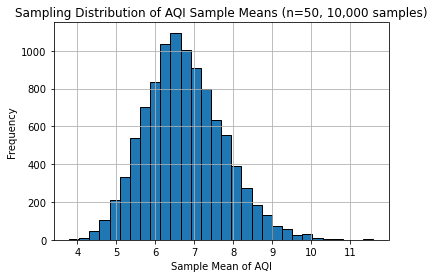

In [12]:
# Output the distribution using a histogram
plt.hist(estimate_df["sample_mean"], bins=30, edgecolor='black')
plt.title("Sampling Distribution of AQI Sample Means (n=50, 10,000 samples)")
plt.xlabel("Sample Mean of AQI")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

<details>
  <summary><h4><strong> Hint 1 </STRONG></h4></summary>

Use the `hist()` function. 

</details>

### Calculate the standard error

Calculate the standard error of the mean AQI using the initial sample of 50. The **standard error** of a statistic measures the sample-to-sample variability of the sample statistic. It provides a numerical measure of sampling variability and answers the question: How far is a statistic based on one particular sample from the actual value of the statistic?

In [13]:
# Calculate the sample standard deviation
sample_std = sampled_data["aqi"].std()

# Calculate the sample size
n = len(sampled_data)

# Compute the standard error
standard_error = sample_std / np.sqrt(n)

# Display the result
print(standard_error)

0.7413225908290327


<details>
  <summary><h4><strong> Hint 1 </STRONG></h4></summary>

Use the `std()` function and the `np.sqrt()` function.

</details>

## Step 4: Results and evaluation

###  Visualize the relationship between the sampling and normal distributions

Visualize the relationship between your sampling distribution of 10,000 estimates and the normal distribution.

1. Plot a histogram of the 10,000 sample means 
2. Add a vertical line indicating the mean of the first single sample of 50
3. Add another vertical line indicating the mean of the means of the 10,000 samples 
4. Add a third vertical line indicating the mean of the actual population

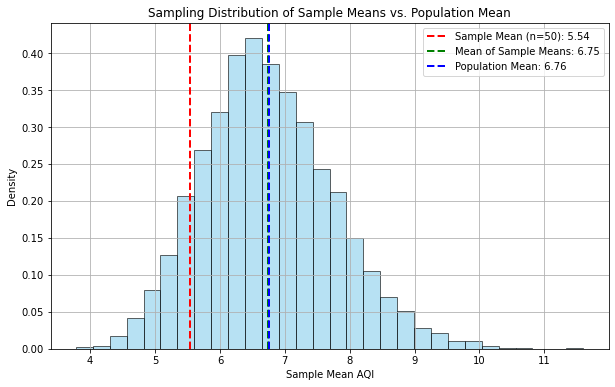

In [14]:
# Plot a histogram of the 10,000 sample means
plt.figure(figsize=(10, 6))
plt.hist(estimate_df["sample_mean"], bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')

# Add a vertical line for the mean of the first sample of 50
plt.axvline(sample_mean, color='red', linestyle='dashed', linewidth=2, label=f"Sample Mean (n=50): {sample_mean:.2f}")

# Add a vertical line for the mean of the 10,000 sample means
plt.axvline(mean_sample_means, color='green', linestyle='dashed', linewidth=2, label=f"Mean of Sample Means: {mean_sample_means:.2f}")

# Add a vertical line for the population mean
plt.axvline(population_mean, color='blue', linestyle='dashed', linewidth=2, label=f"Population Mean: {population_mean:.2f}")

# Add titles and labels
plt.title("Sampling Distribution of Sample Means vs. Population Mean")
plt.xlabel("Sample Mean AQI")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

**Question:** What insights did you gain from the preceding sampling distribution?

Normality of Sampling Distribution: Despite potential skewness or irregularities in the original population data, the sampling distribution of the sample means appears approximately normal. This confirms the central limit theorem, which states that the distribution of the sample means tends toward a normal distribution as the number of samples increases.

Closeness to Population Mean: The mean of the sampling distribution (from 10,000 samples) is very close to the actual population mean. This indicates that repeated sampling is an effective way to estimate the true population parameter.

Variability of Individual Samples: The mean from a single sample of 50 may differ noticeably from the population mean. This highlights the importance of using multiple samples or understanding the standard error to gauge the reliability of sample-based estimates.

Sampling Error is Expected: The histogram demonstrates that there is natural variation between sample means. However, most sample means cluster around the population mean, reinforcing the idea that while individual samples can deviate, the overall trend is reliable.

# Considerations

**What are some key takeaways that you learned from this lab?**

Importance of Sampling in Large Datasets
Sampling allows data professionals to make reliable inferences about a population without needing to analyze the entire dataset. This boosts efficiency and reduces computational demands.

Central Limit Theorem in Action
Regardless of the original distribution, the means of multiple random samples form an approximately normal distribution. This is a powerful principle in statistics, especially when estimating population parameters.

Standard Error as a Measure of Reliability
The standard error quantifies the variability of sample means. A smaller standard error indicates more consistent estimates across samples and greater confidence in sample-based inferences.

Visualizations Strengthen Interpretations
Histograms and vertical lines representing sample means, population means, and sampling means are effective tools for comparing and understanding distributions at a glance.

**What findings would you share with others?**

The average AQI from the entire dataset is approximately 6.76, indicating relatively low air pollution levels across the observed sites on that specific date.

A single random sample (n=50) yielded a slightly different mean, but repeated sampling (10,000 times) produced a distribution of means centered around the true population mean.

Visual analysis confirms the sampling distribution is normal and closely approximates the population mean, validating our sampling approach.

**What would you convey to external stakeholders?**

"Using rigorous sampling techniques and the principles of statistical theory, we can confidently estimate air quality metrics without analyzing every data point. This lab demonstrates that with just 50 randomly selected data points and proper statistical methods, we can produce estimates that are both efficient and reliable. The close alignment between our sample-based estimates and the actual population mean reinforces the credibility of our analytical approach in monitoring environmental health conditions."
